# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

###  1. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business objective is to determine the what factors impact the value of a vehicle in the given dataset.  The price of the vehicle will depend on many factors.  The factors could change from vehicle attributes to demographic requirements.  This dataset has many features which includes geograpical areas of the North America.  In this task I will try to determine what are the most important features that impacts the price of a vehicle. 

### 2. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To understand the data, we need to collect initial data, describe data, explore data, and finally verify the data quality

Following will provide step-by-step actions to unpack the data

#### a. Importing Basic Libraries (Additional libraries will be imported as it necessary) and investigating the data

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None) # show all the columns in the dataset
import warnings
warnings.filterwarnings('ignore') #ignoring all the warnings

In [2]:
vh = pd.read_csv(r"C:\Users\NemindaM19\Google Drive\AI and ML\Module 11\data\vehicles.csv")

In [3]:
vh.head(5).append(vh.tail(5))

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy

In [4]:
for col in vh.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(vh[col].value_counts()) # value count for entire columns 

----------------------------------------id---------------------------------------- - 

7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: id, Length: 426880, dtype: int64

----------------------------------------region---------------------------------------- - 

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

----------------------------------------price---------------------------------------- - 

0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: price, Length: 15655, dtype: int64

----------------------------------------year---------------------------------------- - 

2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0        1
1915.0        1
1902.0        1
1905.0        1
1909.0        1
Name: year, Length: 114, dtype: int64

----------------------------------------manufacturer---------------------------------------- - 

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


----------------------------------------model---------------------------------------- - 

f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: model, Length: 29649, dtype: int64

----------------------------------------condition---------------------------------------- - 

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

----------------------------------------cylinders---------------------------------------- - 

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

----------------------------------------fuel---------------------------------------- - 

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

----------------------------------------odometer---------------------------------------- - 

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: odometer, Length: 104870, dtype: int64

----------------------------------------title_status---------------------------------------- - 

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

----------------------------------------transmission---------------------------------------- - 

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

----------------------------------------VIN---------------------------------------- - 

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
JTHCF5C25A5041393      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 118246, dtype: int64

----------------------------------------drive---------------------------------------- - 

4wd    131904
fwd    105517
rwd     58892
Name: drive, dtype: int64

----------------------------------------size---------------------------------------- - 

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

----------------------------------------type---------------------------------------- - 

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

----------------------------------------paint_color---------------------------------------- - 

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

----------------------------------------state---------------------------------------- - 

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64

In [5]:
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
vh.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

### 3. Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### a. This section will focus on cleaning data before they analyzed 

Which entail:
1. Dropping uncessary data
2. Dropping null or missing data (Systematically, removing missing data without losing majority of the data)

In [7]:
vh.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [8]:
vh.dropna().shape

(34868, 18)

In [9]:
#Dropping id and VIN as it doesn't contribute to value of the car price 
vh_1=vh.drop(columns=['VIN', 'id'])

In [10]:
vh_1.eq(0).sum()

region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

In [11]:
# Determining the missing value as a percentage in each column
round(vh_1.isnull().sum()/len(vh_1)*100,2)

region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64

In [12]:
# Presenting missing values in a Tabular form for better understanding
missing=pd.DataFrame(vh_1.isnull().sum(), columns=["No_of_missing_values"])
missing['Total_no_rows']=len(vh_1)
missing['Percentage']=round(vh_1.isnull().sum()/len(vh_1)*100,2)

In [13]:
missing.sort_values(by='Percentage', ascending=False, inplace=True)
#missing to_csv("Missing_Value_Report.csv") - if require extracting a report
#missing

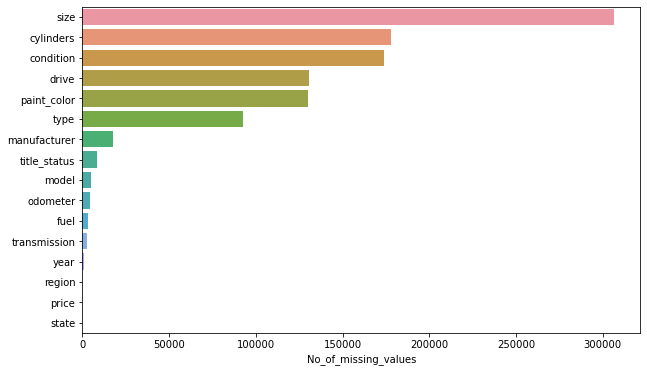

In [14]:
#Plotting the missing values for better visiuals
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=missing, y=missing.index, x='No_of_missing_values');
#plt.xlim(0,50000) - to zoomed in on the no of missing values less than 50,000

In [15]:
#Identifying row-wise missing data
#Sparsity of missing data
vh_1.isnull().sum(axis=1).value_counts()

3     87434
2     85763
0     79195
1     64822
4     45344
6     39156
5     19701
7      4692
10      539
9       125
13       68
11       24
8        17
dtype: int64

In [16]:
missing_rows=vh_1.isnull().sum(axis=1).value_counts()
missing_rows=pd.DataFrame(missing_rows, columns=["Missing_Sparsity"])
missing_rows.reset_index(inplace=True)

In [17]:
missing_rows['No_of_Cols']=vh_1.shape[1]

In [18]:
missing_rows.columns=['No_of_missing_vals','Missing_Sparsity','No_of_Cols']
missing_rows[['No_of_Cols','No_of_missing_vals','Missing_Sparsity']]

No_of_Cols  No_of_missing_vals  Missing_Sparsity
0           16                   3             87434
1           16                   2             85763
2           16                   0             79195
3           16                   1             64822
4           16                   4             45344
5           16                   6             39156
6           16                   5             19701
7           16                   7              4692
8           16                  10               539
9           16                   9               125
10          16                  13                68
11          16                  11                24
12          16                   8                17

In [19]:
# Deep dive into missing data in rows and columns
import missingno as msno

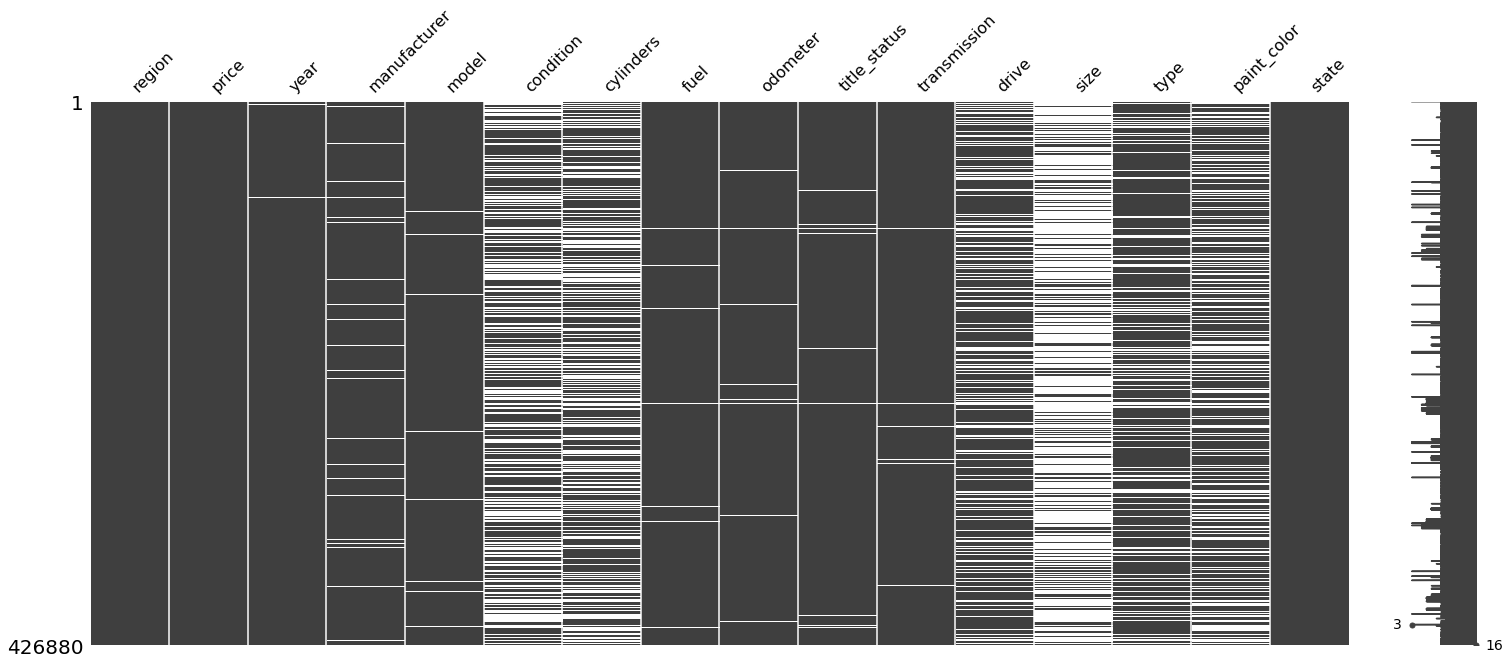

In [20]:
msno.matrix(vh_1);

In [21]:
vh_1

region  price    year manufacturer  \
0                     prescott   6000     NaN          NaN   
1                 fayetteville  11900     NaN          NaN   
2                 florida keys  21000     NaN          NaN   
3       worcester / central MA   1500     NaN          NaN   
4                   greensboro   4900     NaN          NaN   
...                        ...    ...     ...          ...   
426875                 wyoming  23590  2019.0       nissan   
426876                 wyoming  30590  2020.0        volvo   
426877                 wyoming  34990  2020.0     cadillac   
426878                 wyoming  28990  2018.0        lexus   
426879                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission drive size       type paint_color state  
0               NaN          NaN   NaN  NaN        NaN         NaN    az  
1               NaN          NaN   NaN  NaN        NaN         NaN    ar  
2               NaN          NaN   NaN  NaN        NaN         NaN    fl  
3               NaN          NaN   NaN  NaN        NaN         NaN    ma  
4               NaN          NaN   NaN  NaN        NaN         NaN    nc  
...             ...          ...   ...  ...        ...         ...   ...  
426875        clean        other   fwd  NaN      sedan         NaN    wy  
426876        clean        other   fwd  NaN      sedan         red    wy  
426877        clean        other   NaN  NaN  hatchback       white    wy  
426878        clean        other   fwd  NaN      sedan      silver    wy  
426879        clean        other   rwd  NaN      coupe         NaN    wy  

[426880 rows x 16 columns]

In [22]:
#Identifying the rows that has missing values >10 in a row
vh_1[vh_1.isnull().sum(axis=1)>10]

region  price  year manufacturer model condition  \
0                     prescott   6000   NaN          NaN   NaN       NaN   
1                 fayetteville  11900   NaN          NaN   NaN       NaN   
2                 florida keys  21000   NaN          NaN   NaN       NaN   
3       worcester / central MA   1500   NaN          NaN   NaN       NaN   
4                   greensboro   4900   NaN          NaN   NaN       NaN   
...                        ...    ...   ...          ...   ...       ...   
368797     dallas / fort worth   7900   NaN          NaN   NaN       NaN   
372596                 el paso      0   NaN          NaN   NaN       NaN   
375886                 houston   7995   NaN          NaN   NaN       NaN   
402274              bellingham  25956   NaN          NaN   NaN       NaN   
410619   skagit / island / SJI    750   NaN          NaN   NaN       NaN   

       cylinders fuel  odometer title_status transmission drive size type  \
0            NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
1            NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
2            NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
3            NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
4            NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
...          ...  ...       ...          ...          ...   ...  ...  ...   
368797       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
372596       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
375886       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
402274       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
410619       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
368797         NaN    tx  
372596         NaN    tx  
375886         NaN    tx  
402274         NaN    wa  
410619         NaN    wa  

[92 rows x 16 columns]

In [23]:
grt10_ind=vh_1[vh_1.isnull().sum(axis=1)>10].index #can determine corresponding index
grt10_ind

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,     10,     11,     12,     13,     14,     15,
                16,     17,     18,     19,     20,     21,     22,     23,
                24,     25,     26,  30184,  33948,  63236,  70037,  72478,
             80766,  80767,  80768,  80769,  83032,  94693, 104373, 105714,
            106149, 111381, 113021, 116573, 117747, 118484, 118854, 121392,
            121520, 123201, 123992, 144406, 144572, 159273, 172776, 175630,
            196288, 197407, 197408, 214184, 231771, 237781, 237946, 238154,
            240437, 241243, 241437, 242093, 242761, 267108, 268255, 275017,
            283644, 283884, 295053, 295054, 295055, 295056, 295057, 295058,
            331001, 332545, 332728, 333089, 333453, 333842, 335148, 368797,
            372596, 375886, 402274, 410619],
           dtype='int64')

In [24]:
vh_1.drop(grt10_ind, inplace=True) # dropping those indexes from the dataset

In [25]:
vh_1.shape

(426788, 16)

#### b. Deep dive into Price column

In [26]:
# identifying the rows that price=0
vh_1.query('price==0 ')

region  price    year manufacturer              model  condition  \
46          auburn      0  2011.0         jeep            compass  excellent   
126         auburn      0  2018.0    chevrolet  express cargo van   like new   
127         auburn      0  2019.0    chevrolet  express cargo van   like new   
128         auburn      0  2018.0    chevrolet  express cargo van   like new   
191     birmingham      0  2015.0       nissan             sentra  excellent   
...            ...    ...     ...          ...                ...        ...   
426764     wyoming      0  2018.0          NaN      peterbilt 579        NaN   
426812     wyoming      0  2006.0       toyota           scion tc  excellent   
426832     wyoming      0  2004.0       toyota              prius  excellent   
426836     wyoming      0  2018.0          ram               2500  excellent   
426868     wyoming      0  2010.0       toyota              venza  excellent   

          cylinders    fuel  odometer title_status transmission drive  \
46              NaN     gas   99615.0        clean    automatic   NaN   
126     6 cylinders     gas   68472.0        clean    automatic   rwd   
127     6 cylinders     gas   69125.0        clean    automatic   rwd   
128     6 cylinders     gas   66555.0        clean    automatic   rwd   
191     4 cylinders     gas   99505.0        clean    automatic   fwd   
...             ...     ...       ...          ...          ...   ...   
426764          NaN  diesel       1.0        clean    automatic   NaN   
426812  4 cylinders     gas  195000.0        clean    automatic   fwd   
426832  4 cylinders  hybrid  239000.0        clean    automatic   fwd   
426836  6 cylinders  diesel   20492.0        clean    automatic   4wd   
426868  6 cylinders     gas  155000.0        clean    automatic   4wd   

             size   type paint_color state  
46      full-size    SUV         NaN    al  
126     full-size    van       white    al  
127     full-size    van       white    al  
128     full-size    van       white    al  
191           NaN  sedan      silver    al  
...           ...    ...         ...   ...  
426764        NaN    NaN         NaN    wy  
426812        NaN    NaN      silver    wy  
426832        NaN    NaN        blue    wy  
426836  full-size  truck       white    wy  
426868        NaN    NaN        blue    wy  

[32866 rows x 16 columns]

In [27]:
# investigating the the rows that price>1 and <100
vh_1.query('price>1 & price<100')

region  price    year manufacturer            model  \
96                  auburn     80  2004.0        honda              NaN   
1999                dothan      3  2020.0         ford  fusion se sedan   
2345      gadsden-anniston     35  2006.0    chevrolet      trailblazer   
4914            tuscaloosa     24  2020.0          NaN              all   
5727    anchorage / mat-su     10  2011.0   volkswagen              gti   
...                    ...    ...     ...          ...              ...   
418325          janesville     37  2019.0          NaN       Janesville   
418334          janesville     37  2020.0          NaN       Janesville   
418344          janesville     37  2021.0          NaN       Janesville   
418349          janesville     37  2020.0          NaN       Janesville   
420515             madison     15  2018.0    chevrolet       equinox lt   

        condition    cylinders   fuel  odometer title_status transmission  \
96      excellent  6 cylinders    gas   94020.0        clean    automatic   
1999          NaN          NaN    gas      10.0        clean    automatic   
2345          NaN          NaN    gas  161000.0        clean    automatic   
4914          NaN          NaN  other     100.0        clean        other   
5727         good  4 cylinders    gas  119000.0        clean       manual   
...           ...          ...    ...       ...          ...          ...   
418325        NaN          NaN    gas       1.0        clean    automatic   
418334        NaN          NaN    gas       2.0        clean    automatic   
418344        NaN          NaN    gas       1.0        clean    automatic   
418349        NaN          NaN    gas       1.0        clean    automatic   
420515  excellent  4 cylinders    gas   72323.0         lien    automatic   

       drive      size       type paint_color state  
96       NaN       NaN        NaN         NaN    al  
1999     NaN       NaN        NaN         NaN    al  
2345     NaN       NaN        NaN         NaN    al  
4914     NaN       NaN        NaN         NaN    al  
5727     fwd  mid-size  hatchback      custom    ak  
...      ...       ...        ...         ...   ...  
418325   NaN       NaN        NaN         NaN    wi  
418334   NaN       NaN        NaN         NaN    wi  
418344   NaN       NaN        NaN         NaN    wi  
418349   NaN       NaN        NaN         NaN    wi  
420515   fwd   compact        SUV       white    wi  

[1376 rows x 16 columns]

In [28]:
# investigating the the rows that price=10^6
vh_1.query('price>10**6 ')

region       price    year   manufacturer  \
280                     birmingham   987654321  1960.0      chevrolet   
1838                        dothan    99999999  1993.0           ford   
26075              fresno / madera     1111111  2014.0      chevrolet   
29386              humboldt county  1111111111  1999.0           ford   
37409                      modesto  1111111111  2020.0           jeep   
37410                      modesto  3009548743  2021.0      chevrolet   
68935               ventura county     2000000  2002.0         saturn   
91576                     delaware  3024942282  2000.0  mercedes-benz   
105843                     orlando     6995495  2014.0          dodge   
122470                     atlanta   987654321  1960.0      chevrolet   
136516     spokane / coeur d'alene    17000000  2007.0            ram   
137807     spokane / coeur d'alene   123456789  1999.0          buick   
153082                indianapolis  1234567890  2006.0          volvo   
155421                 terre haute     1234567  2006.0           jeep   
184704                   frederick  1410065407  1989.0           jeep   
193736                   ann arbor   123456789  2015.0      chevrolet   
194292                   ann arbor     1234567  2010.0        lincoln   
207080                    muskegon   123456789  2003.0            NaN   
213918       minneapolis / st paul     1111111  1999.0      chevrolet   
219241                southwest MS     1111111  1970.0          dodge   
230753                   asheville   135008900  2008.0         nissan   
241404       raleigh / durham / CH   113456789  1980.0            bmw   
257840                south jersey  3024942282  2000.0  mercedes-benz   
283429               new hampshire     1111111  1994.0      chevrolet   
283906               new hampshire     5000000  2021.0            NaN   
286156                north dakota     1666666  1902.0            NaN   
286323              akron / canton    12345678  2019.0      chevrolet   
286324              akron / canton    12345678  2019.0      chevrolet   
288356              akron / canton   123456789  1965.0      chevrolet   
288400              akron / canton    12345678  2019.0      chevrolet   
288401              akron / canton    12345678  2019.0      chevrolet   
300308                   mansfield    10004000  2002.0           ford   
303014                  youngstown    12345678  2019.0      chevrolet   
303644                  youngstown    12345678  2019.0      chevrolet   
307488                  stillwater   123456789  1996.0            gmc   
318592                      eugene  3736928711  2007.0         toyota   
327938           altoona-johnstown     3226714  2002.0            NaN   
353641                     jackson    11111111  1966.0      chevrolet   
356716                   knoxville  3736928711  1999.0         toyota   
356959                     memphis     1111111  1966.0      chevrolet   
358555                   nashville   123456789  2021.0            NaN   
362822                     abilene     1234567  1955.0      chevrolet   
362837                     abilene     1234567  1955.0      chevrolet   
362867                     abilene     1234567  1955.0      chevrolet   
367296             college station     1234567  1955.0      chevrolet   
367308             college station     1234567  1955.0      chevrolet   
367357             college station     1234567  1955.0      chevrolet   
377396  killeen / temple / ft hood     1234567  1955.0      chevrolet   
377425  killeen / temple / ft hood     1234567  1955.0      chevrolet   
377515  killeen / temple / ft hood     1234567  1955.0      chevrolet   
379133          mcallen / edinburg    25003000  1991.0      chevrolet   
384872                        waco     1234567  1955.0      chevrolet   
384898                        waco     1234567  1955.0      chevrolet   

                          model  condition    cylinders    fuel   odometer  \
280    

In [29]:
#dropping the price = 0 and price is value over 10^6 from the dataset
vh_2 = vh_1.loc[(vh_1['price']>100) & (vh_1['price']<10**6) ]

In [30]:
vh_2.shape

(390368, 16)

In [31]:
# Number of dropped rows as an percentage
drop_row_perc =round((vh_1.index.value_counts().sum()-vh_2.index.value_counts().sum())/vh_1.index.value_counts().sum()*100,2)
drop_row_perc

8.53

#### c.Iterative imputer, Simple imputer, and  fillna method to fill the missing data

In [36]:
#since there is somewhat of a linear correlation between year and price we will be using iterative 
#imputer method to solve for missing values.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [37]:
itera = IterativeImputer(estimator=LinearRegression())

In [38]:
vh_2[['price', 'year']]=itera.fit_transform(vh_2[['price', 'year']])

In [39]:
# Solving for missing value for odometer and rest of the catergorical data 
from sklearn.impute import SimpleImputer

In [141]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(vh_2[['odometer']])
vh_2[['odometer']] = imputer.transform(vh_2[['odometer']])

In [41]:
vh_2['manufacturer'] = vh_2['manufacturer'].fillna(vh_2['manufacturer'].value_counts().index[0])

In [42]:
vh_2['model'] = vh_2['model'].fillna(vh_2['model'].value_counts().index[0])

In [43]:
vh_2['condition'] = vh_2['condition'].fillna(vh_2['condition'].value_counts().index[0])

In [44]:
vh_2['fuel'] = vh_2['fuel'].fillna(vh_2['fuel'].value_counts().index[0])

In [45]:
vh_2['title_status'] = vh_2['title_status'].fillna(vh_2['title_status'].value_counts().index[0])

In [46]:
vh_2['transmission'] = vh_2['transmission'].fillna(vh_2['transmission'].value_counts().index[0])

In [47]:
vh_2['drive'] = vh_2['drive'].fillna(vh_2['drive'].value_counts().index[0])

In [48]:
vh_2['size'] = vh_2['size'].fillna(vh_2['size'].value_counts().index[0])

In [49]:
vh_2['type'] = vh_2['type'].fillna(vh_2['type'].value_counts().index[0])

In [50]:
vh_2['paint_color'] = vh_2['paint_color'].fillna(vh_2['paint_color'].value_counts().index[0])

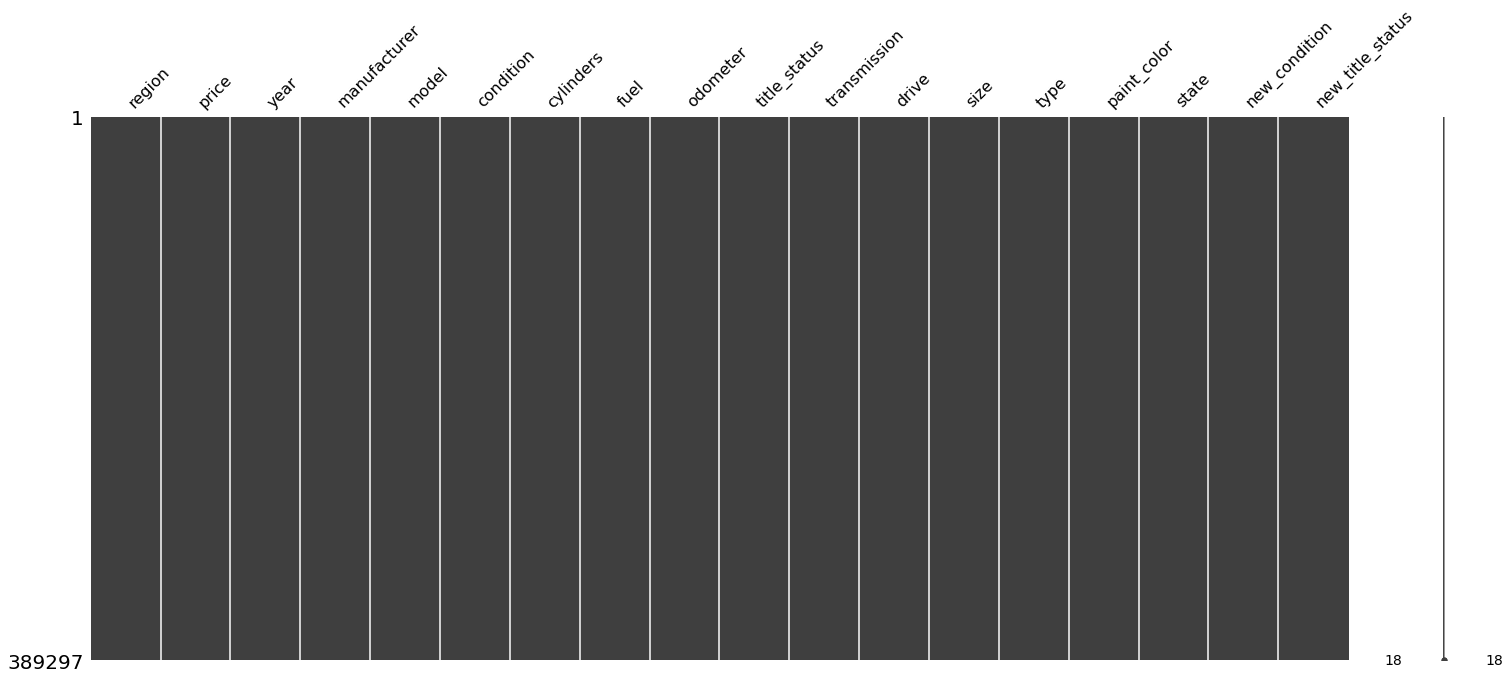

In [65]:
msno.matrix(vh_2);

#### d. Converting nominal and ordinal data to numerical data 

In [52]:
vh_2 = vh_2.query('cylinders != "other"')
vh_2['cylinders'] = vh_2['cylinders'].str.replace('cylinders','')
vh_2['cylinders'] = vh_2['cylinders'].fillna(vh_2['cylinders'].value_counts().index[0])
vh_2['cylinders'] = vh_2['cylinders'].astype(np.int64)

In [53]:
vh_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389297 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389297 non-null  object 
 1   price         389297 non-null  float64
 2   year          389297 non-null  float64
 3   manufacturer  389297 non-null  object 
 4   model         389297 non-null  object 
 5   condition     389297 non-null  object 
 6   cylinders     389297 non-null  int64  
 7   fuel          389297 non-null  object 
 8   odometer      389297 non-null  float64
 9   title_status  389297 non-null  object 
 10  transmission  389297 non-null  object 
 11  drive         389297 non-null  object 
 12  size          389297 non-null  object 
 13  type          389297 non-null  object 
 14  paint_color   389297 non-null  object 
 15  state         389297 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 50.5+ MB


#### e. Encoding for condition and title status 

In [142]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from numpy import asarray

In [103]:
#condition 
assigned_condition = {'salvage':0, 'fair':1, 'good':2, 'excellent':3, 'like new':4, 'new':5}
vh_2['new_condition'] = vh_2['condition'].replace(assigned_condition)
#title_status
assigned_title_status = {'parts only':0, 'missing':1, 'lien':2, 'salvage':3, 'rebuilt':4, 'clean':5}
vh_2['new_title_status'] = vh_2['title_status'].replace(assigned_title_status)
vh_2.head()

region    price    year manufacturer                     model  condition  \
27  auburn  33590.0  2014.0          gmc  sierra 1500 crew cab slt       good   
28  auburn  22590.0  2010.0    chevrolet            silverado 1500       good   
29  auburn  39590.0  2020.0    chevrolet       silverado 1500 crew       good   
30  auburn  30990.0  2017.0       toyota      tundra double cab sr       good   
31  auburn  15000.0  2013.0         ford                 f-150 xlt  excellent   

    cylinders fuel  odometer title_status transmission drive       size  \
27          8  gas   57923.0        clean        other   4wd  full-size   
28          8  gas   71229.0        clean        other   4wd  full-size   
29          8  gas   19160.0        clean        other   4wd  full-size   
30          8  gas   41124.0        clean        other   4wd  full-size   
31          6  gas  128000.0        clean    automatic   rwd  full-size   

      type paint_color state  new_condition  new_title_status  
27  pickup       white    al              2                 5  
28  pickup        blue    al              2                 5  
29  pickup         red    al              2                 5  
30  pickup         red    al              2                 5  
31   truck       black    al              3                 5

In [104]:
vh_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389297 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            389297 non-null  object 
 1   price             389297 non-null  float64
 2   year              389297 non-null  float64
 3   manufacturer      389297 non-null  object 
 4   model             389297 non-null  object 
 5   condition         389297 non-null  object 
 6   cylinders         389297 non-null  int64  
 7   fuel              389297 non-null  object 
 8   odometer          389297 non-null  float64
 9   title_status      389297 non-null  object 
 10  transmission      389297 non-null  object 
 11  drive             389297 non-null  object 
 12  size              389297 non-null  object 
 13  type              389297 non-null  object 
 14  paint_color       389297 non-null  object 
 15  state             389297 non-null  object 
 16  new_condition     3

#### f. Converting all the object data to numerical data

In [105]:
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder()
vh_2_loe = encoder.fit_transform(vh_2.drop(columns = ['condition', 'title_status']), vh_2['price'])

In [106]:
vh_2_loe

region    price    year  manufacturer         model  cylinders  \
27      27250.808824  33590.0  2014.0  25189.808825  35232.105263          8   
28      27331.691176  22590.0  2010.0  20133.457619  23635.201962          8   
29      27206.691176  39590.0  2020.0  20133.118169  34254.940828          8   
30      27269.926471  30990.0  2017.0  17208.868939  34760.978593          8   
31      27387.500000  15000.0  2013.0  21100.397522  20810.317865          6   
...              ...      ...     ...           ...           ...        ...   
426875  22512.096491  23590.0  2019.0  13005.225101  23998.238095          6   
426876  22499.815789  30590.0  2020.0  18405.191659  29786.296296          6   
426877  22492.096491  34990.0  2020.0  20623.359511  34565.202156          6   
426878  22502.622807  28990.0  2018.0  20510.010162  24334.469274          6   
426879  22499.815789  30590.0  2019.0  20590.801092  29893.703704          6   

                fuel  odometer  transmission         drive          size  \
27      17166.251383   57923.0  28351.563922  21182.444329  20082.115888   
28      17166.284790   71229.0  28351.745004  21182.490611  20082.148456   
29      17166.233160   19160.0  28351.465150  21182.419085  20082.098123   
30      17166.259279   41124.0  28351.606723  21182.455269  20082.123586   
31      17166.307841  128000.0  17537.690176  21244.430648  20082.170929   
...              ...       ...           ...           ...           ...   
426875  17166.281753   32226.0  28351.728542  12705.754658  20082.145496   
426876  17166.260494   12029.0  28351.613308  12705.682396  20082.124770   
426877  33905.778479    4174.0  28351.540875  21182.438439  20082.111743   
426878  17166.265353   30112.0  28351.639647  12705.698913  20082.129507   
426879  17166.260494   22716.0  28351.613308  21244.145900  20082.124770   

                type   paint_color         state  new_condition  \
27      28733.019490  19623.320442  21331.446727              2   
28      28733.286144  17345.342437  21333.800171              2   
29      28732.874042  19661.535212  21330.163030              2   
30      28733.082517  19661.835933  21332.002995              2   
31      27170.814161  21944.043680  21335.424048              3   
...              ...           ...           ...            ...   
426875  15143.175503  19623.373808  22512.096491              2   
426876  15143.132679  19661.849920  22499.815789              2   
426877  15082.603471  19623.312971  22492.096491              2   
426878  15143.142467  16913.227871  22502.622807              2   
426879  23341.679779  19623.336452  22499.815789              2   

        new_title_status  
27                     5  
28                     5  
29                     5  
30                     5  
31                     5  
...                  ...  
426875                 5  
426876                 5  
426877                 5  
426878                 5  
426879                 5  

[389297 rows x 16 columns]

#### g. Investigating the correlation data

Text(0.5, 1.0, 'Heat map of the Vehicle Data')

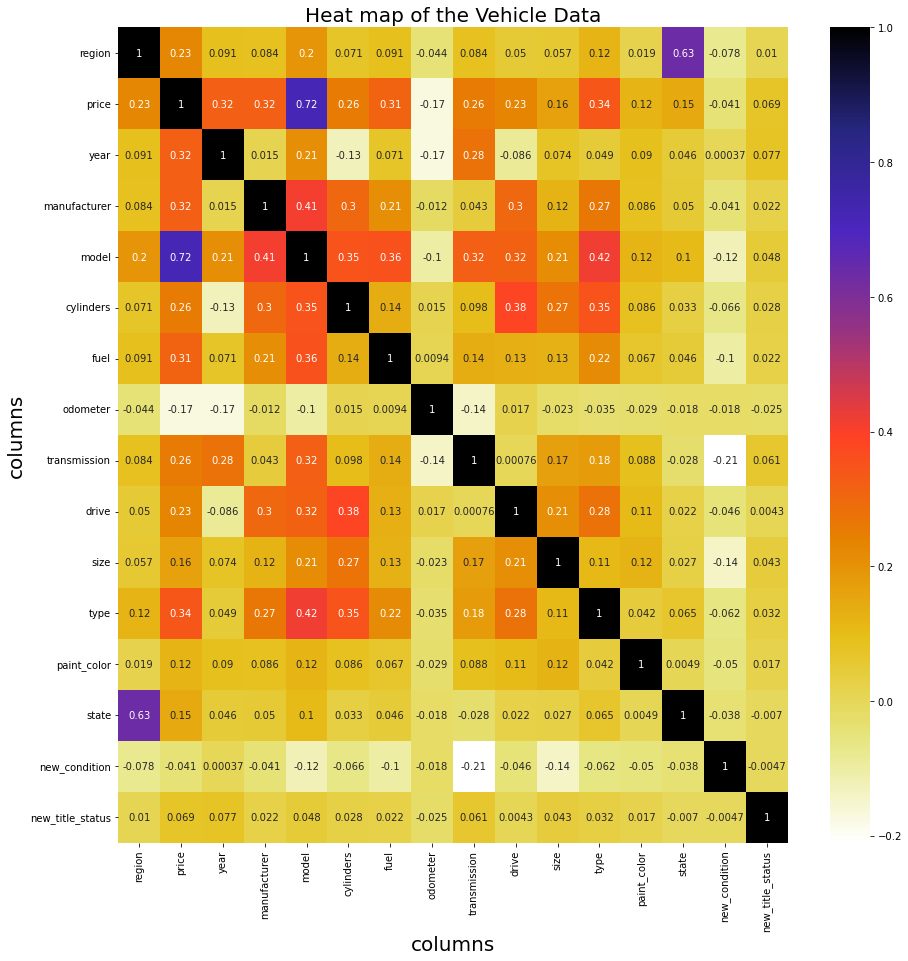

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(vh_2_loe.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.xlabel('columns', fontsize=20)
plt.ylabel('columns', fontsize=20)
plt.title('Heat map of the Vehicle Data',fontsize=20)

There is a high correlation model to price and region to state can be seen from the heat map

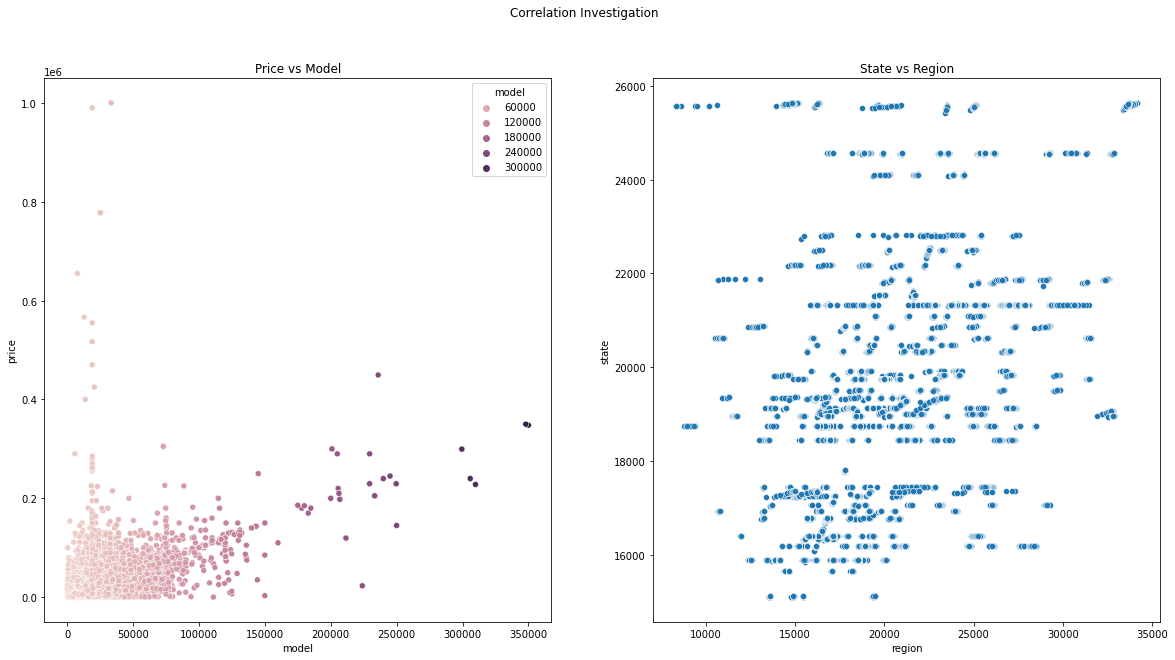

In [151]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,10));
fig.suptitle('Correlation Investigation')
axes[0].set_title('Price vs Model')
axes[1].set_title('State vs Region')
sns.scatterplot(ax=axes[0], data=vh_2_loe, x="model", y="price", hue='model');
sns.scatterplot(ax=axes[1],data=vh_2_loe, x="region", y="state");

### 4 Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### a. Creating a train and test dataset

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=vh_2_loe.drop('price', axis=1)
y=vh_2_loe.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =21)

#### b. Fitting, setting up the hyperparameters, and GridSearch to determine the optimum alpha value

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
ridge_model_scaled = Pipeline([('scale', StandardScaler()),('ridge', Ridge(random_state = 21))])

In [123]:
parameters_test = {'ridge__alpha': 10**np.linspace(-10, 8, 100)}

In [124]:
model_f = GridSearchCV(estimator = ridge_model_scaled,param_grid = parameters_test)
model_f.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('ridge', Ridge(random_state=21))]),
             param_grid={'ridge__alpha': array([1.00000000e-10, 1.51991108e-10, 2.31012970e-10, 3.51119173e-10,
       5.33669923e-10, 8.11130831e-10, 1.23284674e-09, 1.87381742e-09,
       2.84803587e-09, 4.32876128e-09, 6.57933225e-09, 1.00000000e-08,
       1.51991108e-08, 2.31012970e-08, 3.511...
       6.57933225e+03, 1.00000000e+04, 1.51991108e+04, 2.31012970e+04,
       3.51119173e+04, 5.33669923e+04, 8.11130831e+04, 1.23284674e+05,
       1.87381742e+05, 2.84803587e+05, 4.32876128e+05, 6.57933225e+05,
       1.00000000e+06, 1.51991108e+06, 2.31012970e+06, 3.51119173e+06,
       5.33669923e+06, 8.11130831e+06, 1.23284674e+07, 1.87381742e+07,
       2.84803587e+07, 4.32876128e+07, 6.57933225e+07, 1.00000000e+08])})

#### c. Best parameter

In [125]:
model_f.best_params_ 

{'ridge__alpha': 43.287612810830616}

#### d. Rerun the Pipeline with optimum alpha value

In [155]:
ridge_alpha = Pipeline([('scale', StandardScaler()),
                               ('ridge', Ridge(alpha=43.287612810830616, random_state = 21))])
ridge_alpha.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('ridge', Ridge(alpha=43.287612810830616, random_state=21))])

#### e. Extracting the coefficients for optimum alpha

In [187]:
coefficients3 = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(ridge_alpha[-1].coef_)})
coefficients3.sort_values('Coefficients', ascending=False)

Feature  Coefficients
3              model   9532.496637
1               year   2766.450204
5               fuel    994.496628
0             region    913.360631
13     new_condition    777.198457
10              type    566.188204
12             state    508.596433
4          cylinders    453.136132
2       manufacturer    421.661796
14  new_title_status    316.896656
11       paint_color    288.546621
8              drive    279.835662
9               size    -74.530639
7       transmission   -217.692868
6           odometer  -1216.470602

#### f. Investigating the MSE

In [132]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, ridge_alpha.predict(X_train))
test_mse = mean_squared_error(y_test, ridge_alpha.predict(X_test))

print('Training MSE: ', train_mse)
print('Test MSE: ', test_mse)

training mse:  105747149.74662627
test mse:  101355278.87166786


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

It can be seen from the heatmap, highest correlation was achieved 0.72 price vs model and the second highest was region vs state.  We can eliminate the region vs state as this is not directly impacting the price of the vehicle as much as model.  

Also it can be observe from the coefficiants that model year of the car increased the price of the car and having high negative coefficiant value for odometer states price decreased as the odometer increases.  

Our objective is to determine what factors impact the vehicle price in general.  Based on the initial investiagtion it can be concluded that model, year, and odometer of the vehicle mostly impacted the price of the vehicle. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

From the dataset we can identify the most popular model and year that people considered value for their price.  Also we can determine from the dataset what odometer range is more susceptible have a high demand.  To be on the safeside and manage risk to reward benefits we can focus on that.  Regardless of the geographical location of North America, certain models, certain year range, and certain odometer range is favored by the buyers.  Hence it can be concluded, based on the analysis main factors that can impact price of a vehicle is model, year, and odometer reading. 